In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from estimator.perceptron import Perceptron

In [2]:
#Generate linearly separable dataset with two gausssean distributions with far away means. 
#Perceptron only works on linearly separable datasets. In more complex datasets the performance would be damnable 

n_samples = 10000

#Gaussean with mean [2,2] and std [1,1] for class 0
X1 = np.random.normal(loc=[2, 2], scale=[1, 1], size=(n_samples // 2, 2))
y1 = np.zeros((n_samples // 2,))

#Gaussean with mean [-2,-2] and std [1,1] for class 1
X2 = np.random.normal(loc=[-2, -2], scale=[1, 1], size=(n_samples // 2, 2))
y2 = np.ones((n_samples // 2,))

#Concatenate classes
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

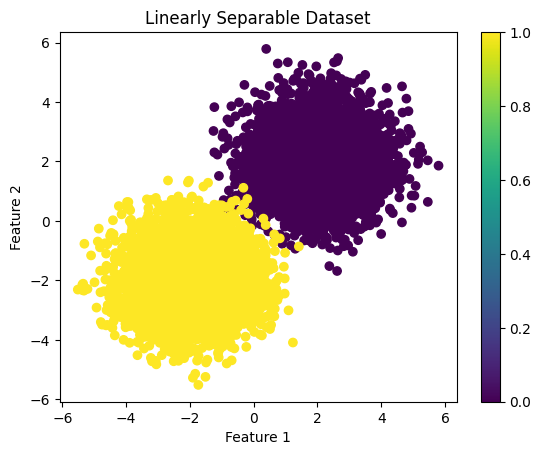

In [3]:
# Plot the linearly separable dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.colorbar()
plt.show()

In [4]:
print(f"Class 0 samples:{y[y == 0].shape}, Class 1 samples{y[y == 1].shape}")

Class 0 samples:(5000,), Class 1 samples(5000,)


In [5]:
#Perceptron parameters
input_shape = X.shape[1]
transfer_function = "heaviside"
epochs = 100

In [6]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
#Create perceptron
estimator = Perceptron(input_shape = input_shape,transfer_function = transfer_function)

In [8]:
# Train the perceptron
weights_before = estimator.weights.copy()
estimator.Widrow_Hoff_rule(X_train, y_train, epochs=epochs)
weights_after = estimator.weights.copy()

100%|██████████| 100/100 [00:08<00:00, 12.36it/s]


In [9]:
print(f"weights before: {weights_before}, weights after: {weights_after}")
print(f"weights change: {weights_after - weights_before}")

weights before: [-1.14010978 -0.53767693], weights after: [-0.62331649 -0.60867204]
weights change: [ 0.51679329 -0.07099511]


In [10]:
#Predict with perceptron
train_predictions = estimator.foward(X_train)
test_predictions = estimator.foward(X_test)

In [11]:
# Calculate accuracy 
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.99825
Test Accuracy: 0.997
